In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000946673"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000946673
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,BANNER CORP
Ticker,BANR


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,27.0,3.086148e+01,9.213414e+00,17.64,2.140500e+01,2.983000e+01,3.928500e+01,4.299000e+01
interest income,1.0,3.699500e+07,NaN,36995000.00,3.699500e+07,3.699500e+07,3.699500e+07,3.699500e+07
net income,62.0,6.588887e+06,1.915008e+07,-78531000.00,2.607750e+06,8.008000e+06,1.480425e+07,3.777300e+07
net interest income,63.0,4.569589e+07,3.099787e+07,-10075000.00,2.397800e+07,3.671000e+07,4.926050e+07,1.149590e+08
provision for loan losses,63.0,5.482587e+06,8.834538e+06,-77000.00,1.000000e+06,2.000000e+06,5.000000e+06,4.500000e+07
total revenue,20.0,1.038226e+08,2.907432e+07,58573000.00,6.727000e+07,1.161665e+08,1.232012e+08,1.384770e+08


# Plots

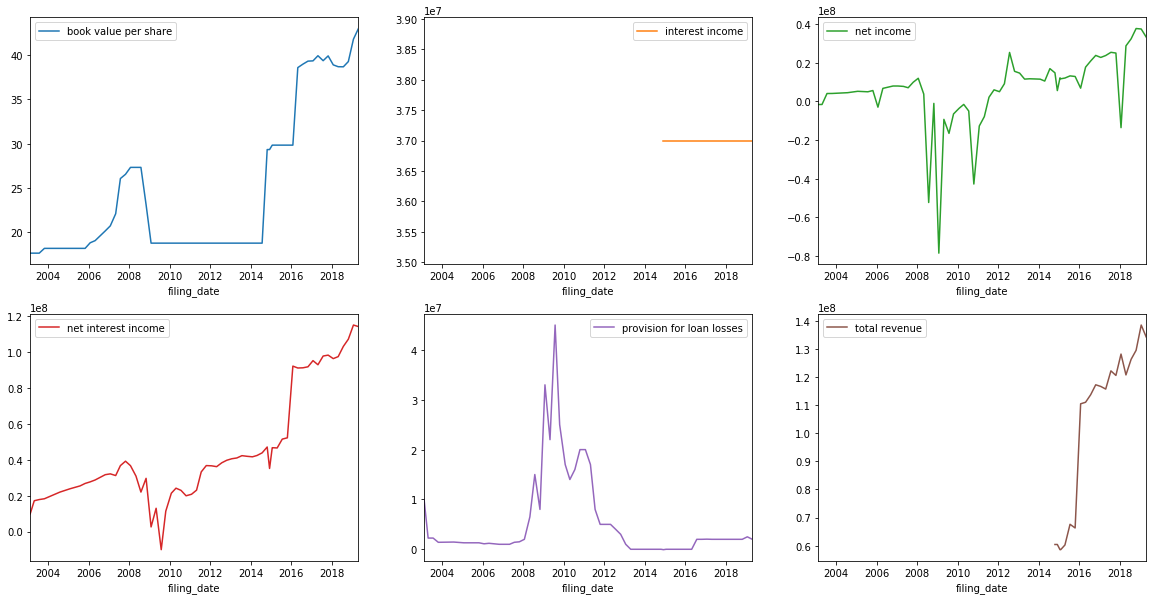

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000946673 book value per share                             2002Q3    missing   
           book value per share        2003Q1 to 2003Q2: 2 periods    missing   
           book value per share        2003Q4 to 2005Q3: 8 periods    missing   
           book value per share                             2006Q2    missing   
           book value per share        2008Q1 to 2008Q2: 2 periods    missing   
           book value per share       2009Q1 to 2014Q2: 22 periods    missing   
           book value per share        2015Q1 to 2015Q4: 4 periods    missing   
           interest income            2002Q3 to 2014Q2: 48 periods    missing   
           interest income            2014Q4 to 2019Q1: 18 periods    missing   
           net income                                       2002Q3    missing   
           net income                                       2003Q1    missing   
           net income                  2003Q4 to 2004Q1: 2 periods    missing   
           net income                                       2004Q3    missing   
           net income                                       2005Q1    missing   
           net income                                       2006Q2    missing   
           net income                                       2014Q3  duplicate   
           net interest income                              2002Q3    missing   
           net interest income         2003Q4 to 2004Q1: 2 periods    missing   
           net interest income                              2004Q3    missing   
           net interest income                              2005Q1    missing   
           net interest income                              2006Q2    missing   
           net interest income                              2014Q3  duplicate   
           provision for loan losses   2003Q3 to 2004Q1: 3 periods    missing   
           provision for loan losses                        2004Q3    missing   
           provision for loan losses                        2005Q1    missing   
           provision for loan losses                        2006Q2    missing   
           provision for loan losses                        2014Q3  duplicate   
           total revenue              2002Q3 to 2014Q2: 48 periods    missing   

                                               message  
cik        item                                         
0000946673 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           provision for loan los

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()